## Multivariate Linear Reg Model <font color='red'>Oct-17 </font>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [7]:
#reading csv file into df
oct_df = pd.read_csv('data/oct17-listings.csv', encoding='iso8859')
oct_df.head(2)

,row_id,id,scrape_id,last_scraped,name,host_id,host_name,host_since,host_response_rate,host_neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,1,16570521,2.020000e+13,10/2/17,Lands' End hideaway,21303289,Eugenia And Alessandro,9/14/14,100%,Sea Cliff,...,10.0,10.0,9.0,9.0,10.0,10.0,f,moderate,2,2.02
1,2,8001958,2.020000e+13,10/2/17,Ocean and park front panoramic view,24591867,Raul,12/7/14,NaN,Richmond District,...,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1,NaN


In [8]:
oct_df.columns

Index(['row_id', 'id', 'scrape_id', 'last_scraped', 'name', 'host_id',
       'host_name', 'host_since', 'host_response_rate', 'host_neighbourhood',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
   

In [9]:
#creating subset dataframe from oct_df
df = pd.get_dummies(oct_df[['property_type', 'bed_type']])
df.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Condominium,...,property_type_Timeshare,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df1 = oct_df[['accommodates','bedrooms','bathrooms']]
df1.isnull().sum()

accommodates     0
bedrooms         8
bathrooms       31
dtype: int64

In [11]:
df1.bedrooms = df1.bedrooms.fillna(1)
df1.bathrooms = df1.bathrooms.fillna(1)

/Users/manjeetchawla/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
df1.isnull().sum()

accommodates    0
bedrooms        0
bathrooms       0
dtype: int64

In [13]:
#joining 2 dfs
X = pd.concat([df1, df],axis=1)
X.head()

,accommodates,bedrooms,bathrooms,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,...,property_type_Timeshare,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,2,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,3.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7,3.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
y = oct_df['price'].replace({'\$':'',',':''}, regex=True)
y = y.astype(float)
y = y.values.reshape(-1,1)
y.shape, X.shape

((8933, 1), (8933, 34))

In [15]:
#splitting dataset into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6699, 34), (6699, 1), (2234, 34), (2234, 1))

In [16]:
#creating model and trying fit

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model.coef_, model.intercept_

(array([[  3.45775894e+01,   8.99144924e+01,   1.29330854e+02,
           2.57089684e+01,   1.21489465e+01,  -3.47201144e+01,
           3.16730693e+02,   1.36160720e+01,   7.83917682e+01,
           1.13612623e+02,  -1.65630263e+02,   5.20756574e+01,
           5.60580992e+01,  -1.73216625e+02,  -5.68434189e-14,
          -2.59615471e+01,  -5.95135573e+00,  -5.94071495e+02,
          -3.79708138e+01,   1.27677965e+01,   1.62298714e+02,
           5.61232742e+01,  -5.68434189e-14,   9.78289221e+01,
           8.96761958e+01,  -3.76622430e+01,  -8.55178606e+01,
          -6.50795214e+01,   1.38744109e+02,   2.77055805e+02,
          -9.36316056e+01,  -1.07933530e+02,  -2.05200595e+01,
          -5.49706090e+01]]), array([-103.92798427]))

In [18]:
#predicting price using model

pred = model.predict(X_test)
pred[:5]

array([[ 602.68109685],
       [ 155.21090035],
       [ 142.26972852],
       [ 155.21090035],
       [ 155.21090035]])

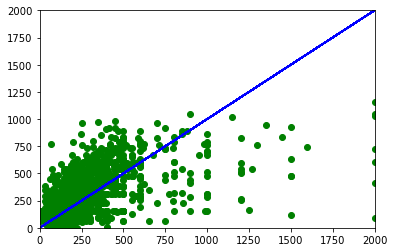

In [19]:
#plotting predictions and test values
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.plot(y_test,y_test, c= 'blue')
plt.scatter(y_test, pred, c='green')
plt.show()

## Same features - scaled data

In [20]:
#since plot does not look that good,still calculating model score and mse
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)
MSE,r2

(276368.4647310162, 0.11400596383811812)

In [21]:
##trying by standardizing features and target

from sklearn.preprocessing import StandardScaler

x_scale = StandardScaler().fit(X_train)
y_scale = StandardScaler().fit(y_train)

In [22]:
#transforming data using x_scale

x_train_scaled = x_scale.transform(X_train)
x_test_scaled = x_scale.transform(X_test)
y_train_scaled = y_scale.transform(y_train)
y_test_scaled = y_scale.transform(y_test)

In [23]:
x_train_scaled.shape, y_train_scaled.shape, x_test_scaled.shape, y_test_scaled.shape

((6699, 34), (6699, 1), (2234, 34), (2234, 1))

In [24]:
model2 = LinearRegression()
model2.fit(x_train_scaled,y_train_scaled)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#checking coeffs, intercepts
model2.coef_,model2.intercept_

(array([[  1.70080437e-01,   1.95388672e-01,   2.03657705e-01,
           7.13385972e+12,   1.43418936e+12,   3.90742259e+11,
           1.01672163e+12,   6.29676360e+11,   5.24079099e+11,
           7.40661064e+11,   3.49516605e+11,   1.74797452e+11,
           3.83854834e+12,   8.89630703e+11,   1.66419785e+13,
           1.23147527e+12,   8.18586456e+11,   7.80608446e+11,
           6.53622914e+12,   1.26759533e+12,   1.61990138e+12,
           1.62906135e+12,  -1.36767707e+11,   1.74797452e+11,
           1.04604094e+12,   1.19422890e+12,   3.02712863e+11,
           1.74797452e+11,   2.47182473e+11,   3.61798909e+12,
           2.59458889e+12,   4.17361463e+12,   4.25247930e+12,
           7.37105026e+12]]), array([ 0.00101327]))

In [26]:
#predictiongs
pred2 = model2.predict(x_test_scaled)
pred2[:5]

array([[ 0.83923541],
       [-0.23010053],
       [-0.28478803],
       [-0.23010053],
       [-0.23010053]])

In [39]:
#unscaling data
pred_unscaled = y_scale.inverse_transform(pred2)
y_unscaled = y_scale.inverse_transform(y_test_scaled)
pred_unscaled[:5], y_unscaled[:5]

(array([[ 600.16698792],
        [ 154.00705402],
        [ 131.18974233],
        [ 154.00705402],
        [ 154.00705402]]), array([[ 315.],
        [ 230.],
        [  89.],
        [ 130.],
        [ 170.]]))

In [36]:
mse2 = mean_squared_error(y_unscaled,pred_unscaled)
r2 = r2_score(y_unscaled,pred_unscaled)
mse2, r2

(1.6682971513111327e+28, -5.3482995176245092e+22)

## Trying gradient boosting in this setup

In [40]:
#import model dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.externals import joblib

In [71]:
# Fit regression model
model4 = ensemble.GradientBoostingRegressor(
    n_estimators=4000,
    learning_rate=0.25,
    max_depth=5,
    min_samples_leaf=10,
    max_features=1,
    loss='lad',
    random_state=20
)
model4.fit(X_train, y_train)

/Users/manjeetchawla/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='lad', max_depth=5, max_features=1,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             presort='auto', random_state=20, subsample=1.0, verbose=0,
             warm_start=False)

In [72]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, model4.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model4.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

#r2 score
r2 = r2_score(y_test, model4.predict(X_test))
print("r2 score: %.4f" % r2)

Training Set Mean Absolute Error: 100.9298
Test Set Mean Absolute Error: 113.8657
r2 score: 0.1033
